In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', False)

In [3]:
# Load the split datasets 
df_part1 = pd.read_csv('data/survey_results_public_part1.csv')
df_part2 = pd.read_csv('data/survey_results_public_part2.csv')

In [4]:
#Concatenate both datasets
df = pd.concat([df_part1, df_part2], axis=0)

In [5]:
# Reset the indexes of both dataframes
df.reset_index(drop=True, inplace=True)

### Exploratory Data Analysis (EDA) - Overview

![alt text](https://moriohcdn.b-cdn.net/ff3cc511fb.png)

The EDA is a crucial step that allows data analysts to:

1. #### Understand the dataset's structure and content.
2. #### Identify data quality issues (e.g., missing values, duplicates, inconsistent data).
3. #### Detect outliers or anomalies in the data.
4. #### Summarize the key features (mean, median, mode, variance, etc.).
5. #### Formulate hypotheses for further analysis.

In [6]:
# Getting familiar with the data
df.head(5)

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,...,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other (please specify):,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;Colleague;On the job training;Other online resources (e.g., videos, blogs, forum, online community)",Technical documentation;Blogs;Books;Written Tutorials;Stack Overflow,API document(s) and/or SDK document(s);User guides or README files found in the source repository;First-party knowledge base;Traditional public search engine,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern Ireland,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaScript;Python;TypeScript,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaScript;Kotlin;Python;TypeScript,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaScript;Python;TypeScript,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disagree,Disagree,Agree,Agree,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other (please specify):,"Master’s degree (M.A

1. #### Understand the dataset's structure and content.
##### What is the shape of the dataframe and what are the datatypes associated with each feature?

Here, we can also load the survey schema csv file to get more information about each feature

In [7]:
df.shape

(65437, 114)

In [8]:
df.dtypes

ResponseId               int64
MainBranch              object
Age                     object
Employment              object
RemoteWork              object
                        ...   
JobSatPoints_11        float64
SurveyLength            object
SurveyEase              object
ConvertedCompYearly    float64
JobSat                 float64
Length: 114, dtype: object

In [27]:
for col in df.columns:
    print(f'{col}: {df[col].dtype}')

ResponseId: int64
MainBranch: object
Age: object
Employment: object
RemoteWork: object
Check: object
CodingActivities: object
EdLevel: object
LearnCode: object
LearnCodeOnline: object
TechDoc: object
YearsCode: float64
YearsCodePro: float64
DevType: object
OrgSize: object
PurchaseInfluence: object
BuyNewTool: object
BuildvsBuy: object
TechEndorse: object
Country: object
Currency: object
CompTotal: float64
LanguageHaveWorkedWith: object
LanguageWantToWorkWith: object
LanguageAdmired: object
DatabaseHaveWorkedWith: object
DatabaseWantToWorkWith: object
DatabaseAdmired: object
PlatformHaveWorkedWith: object
PlatformWantToWorkWith: object
PlatformAdmired: object
WebframeHaveWorkedWith: object
WebframeWantToWorkWith: object
WebframeAdmired: object
EmbeddedHaveWorkedWith: object
EmbeddedWantToWorkWith: object
EmbeddedAdmired: object
MiscTechHaveWorkedWith: object
MiscTechWantToWorkWith: object
MiscTechAdmired: object
ToolsTechHaveWorkedWith: object
ToolsTechWantToWorkWith: object
ToolsTechAd

In [30]:
# Convert some columns to numeric 
df[['YearsCode', 'YearsCodePro']] = df[['YearsCode', 'YearsCodePro']].apply(pd.to_numeric, errors='coerce').astype('Int64')

In [38]:
df.shape

(65437, 114)

In [41]:
df.head(3)

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,...,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other (please specify):,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;Colleague;On the job training;Other online resources (e.g., videos, blogs, forum, online community)",Technical documentation;Blogs;Books;Written Tutorials;Stack Overflow,API document(s) and/or SDK document(s);User guides or README files found in the source repository;First-party knowledge base;Traditional public search engine,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern Ireland,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaScript;Python;TypeScript,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaScript;Kotlin;Python;TypeScript,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaScript;Python;TypeScript,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disagree,Disagree,Agree,Agree,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other (please specify):,"Master’s degree (M

In [45]:
columns = ['JobSatPoints_1', 'JobSatPoints_4', 
           'JobSatPoints_5', 'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 
           'JobSatPoints_9', 'JobSatPoints_10', 'JobSatPoints_11', 'JobSat']

try:
    job_sat = df[columns]
    print("DataFrame created successfully.")
except KeyError as e:
    print(f"Error: {e}. Please check your column names.")


DataFrame created successfully.


In [47]:
job_sat.head(3)

,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,JobSat
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
job_sat['JobSatPoints_1'].value_counts()

JobSatPoints_1
0.00      11271
10.00      4010
20.00      2909
5.00       1496
30.00      1309
15.00      1150
50.00      1038
25.00       782
80.00       754
100.00      662
40.00       641
90.00       558
70.00       499
60.00       408
8.00        184
7.00        153
35.00       132
75.00       131
2.00        100
1.00        100
9.00         95
6.00         83
3.00         76
4.00         71
12.00        70
85.00        68
45.00        52
95.00        44
33.00        38
11.00        37
65.00        36
13.00        36
14.00        33
18.00        33
22.00        28
55.00        26
16.00        26
17.00        17
19.00        13
23.00        12
99.00        12
34.00         8
32.00         7
24.00         7
28.00         6
88.00         5
98.00         5
78.00         5
79.00         4
69.00         4
56.00         4
76.00         4
68.00         4
12.50         4
89.00         4
26.00         3
87.00         3
38.00         3
21.00         3
66.00         3
86.00         3
77.00    

In [52]:
df.shape

(65437, 114)

In [10]:
schema = pd.read_csv('data/survey_results_schema.csv', encoding = 'cp1252')

In [11]:
schema

,qid,qname,question,force_resp,type,selector
0,QID2,MainBranch,"Which of the following options best describes you today? For the purpose of this survey, a developer is ""someone who writes code"".*",True,MC,SAVR
1,QID127,Age,What is your age?*,True,MC,SAVR
2,QID296,Employment,Which of the following best describes your current employment status? Select all that apply.*,True,MC,MAVR
3,QID308,RemoteWork,Which best describes your current work situation?,False,MC,SAVR
4,QID341,Check,Just checking to make sure you are paying attention to the survey questions. Select ‘Apples’ from the list and you can get back to the survey.*<br><br>,True,MC,SAVR
5,QID297,CodingActivities,Which of the following best describes the code you write outside of work? Select all that apply.,False,MC,MAVR
6,QID25,EdLevel,Which of the following best describes the highest level of formal education that you’ve completed? *,True,MC,SAVR
7,QID276,LearnCode,How do you learn to code? Select all that apply.,False,MC,MAVR
8,QID281,LearnCodeOnline,What online resources do you use to learn to code? Select all that apply.,False,MC,MAVR
9,QID331,TechDoc,What is the source of the technical documentation you use most often to learn to code? Select all that apply.,False,MC,MAVR


In [51]:
df.head(10)

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,...,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other (please specify):,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;Colleague;On the job training;Other online resources (e.g., videos, blogs, forum, online community)",Technical documentation;Blogs;Books;Written Tutorials;Stack Overflow,API document(s) and/or SDK document(s);User guides or README files found in the source repository;First-party knowledge base;Traditional public search engine,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern Ireland,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaScript;Python;TypeScript,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaScript;Kotlin;Python;TypeScript,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaScript;Python;TypeScript,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disagree,Disagree,Agree,Agree,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other (please specify):,"Master’s degree (M

In [ ]:
year = df[['YearsCode', 'YearsCodePro']]
year.head(4)

,YearsCode,YearsCodePro
0,NaN,NaN
1,20,17
2,37,27
3,4,NaN


In [25]:
year.isna().sum() / len(year)

YearsCode       0.085089
YearsCodePro    0.211302
dtype: float64

In [31]:
# Create a numeric dataset
numeric = df.select_dtypes(include=['number'])

In [32]:
pd.set_option('display.max_rows', None)
numeric.dtypes

ResponseId               int64
YearsCode                Int64
YearsCodePro             Int64
CompTotal              float64
WorkExp                float64
JobSatPoints_1         float64
JobSatPoints_4         float64
JobSatPoints_5         float64
JobSatPoints_6         float64
JobSatPoints_7         float64
JobSatPoints_8         float64
JobSatPoints_9         float64
JobSatPoints_10        float64
JobSatPoints_11        float64
ConvertedCompYearly    float64
JobSat                 float64
dtype: object

In [33]:
numeric.head(3)

,ResponseId,YearsCode,YearsCodePro,CompTotal,WorkExp,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,ConvertedCompYearly,JobSat
0,1,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,20,17,NaN,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2,3,37,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
numeric.isna().sum()

ResponseId                 0
YearsCode               6391
YearsCodePro           16733
CompTotal              31697
WorkExp                35779
JobSatPoints_1         36113
JobSatPoints_4         36044
JobSatPoints_5         36026
JobSatPoints_6         35987
JobSatPoints_7         35989
JobSatPoints_8         35981
JobSatPoints_9         35981
JobSatPoints_10        35987
JobSatPoints_11        35992
ConvertedCompYearly    42002
JobSat                 36311
dtype: int64

In [35]:
numeric_summary = pd.DataFrame(
    {
        'Numeric columns': [col for col in numeric.columns],
        "Missing count": [df[col].isna().sum() for col in numeric.columns],
        "Percentage missing": [df[col].isna().sum() / len(numeric) for col in numeric.columns]
    }
)

In [36]:
numeric_summary["Percentage missing"] = numeric_summary["Percentage missing"].round(3)
numeric_summary = numeric_summary.sort_values(by='Missing count', ascending=False)
numeric_summary

,Numeric columns,Missing count,Percentage missing
14,ConvertedCompYearly,42002,0.642
15,JobSat,36311,0.555
5,JobSatPoints_1,36113,0.552
6,JobSatPoints_4,36044,0.551
7,JobSatPoints_5,36026,0.551
13,JobSatPoints_11,35992,0.550
9,JobSatPoints_7,35989,0.550
8,JobSatPoints_6,35987,0.550
12,JobSatPoints_10,35987,0.550
10,JobSatPoints_8,35981,0.550


In [12]:
#Create a mini dataframe with essential columns
mini_df = df[['Age', 'YearsCode', 'YearsCodePro', 'Country', 'DevType', 'OrgSize']]

In [13]:
mini_df.isna().sum()

Age                 0
YearsCode        5568
YearsCodePro    13827
Country          6507
DevType          5992
OrgSize         17957
dtype: int64

In [14]:
mini_df.shape

(65437, 6)

In [15]:
# Percentage of missing values
mini_df.isna().sum() / len(mini_df)

Age             0.000000
YearsCode       0.085089
YearsCodePro    0.211302
Country         0.099439
DevType         0.091569
OrgSize         0.274417
dtype: float64

In [16]:
df.isnull().sum()

ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 114, dtype: int64

In [17]:
df['Age'].value_counts()

Age
25-34 years old       23911
35-44 years old       14942
18-24 years old       14098
45-54 years old        6249
55-64 years old        2575
Under 18 years old     2568
65 years or older       772
Prefer not to say       322
Name: count, dtype: int64

<Axes: >

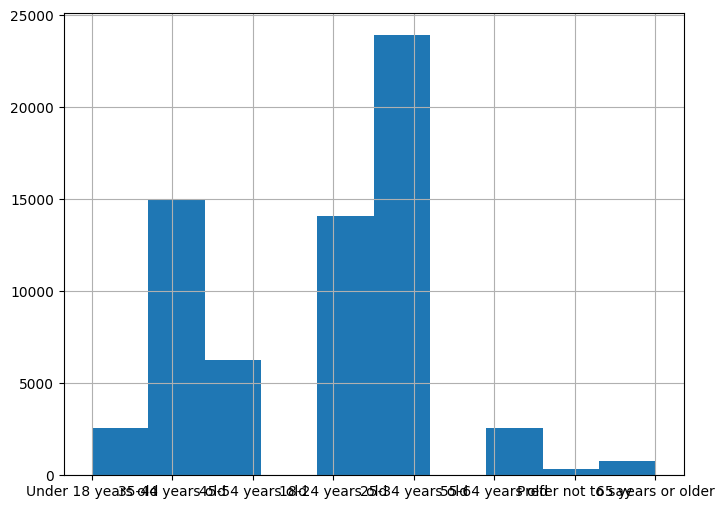

In [18]:
df['Age'].hist(figsize=(8,6))

C:\Users\cocou\AppData\Local\Temp\ipykernel_4352\2341268801.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x ='Age',  data=df, order=age_order, palette='viridis')


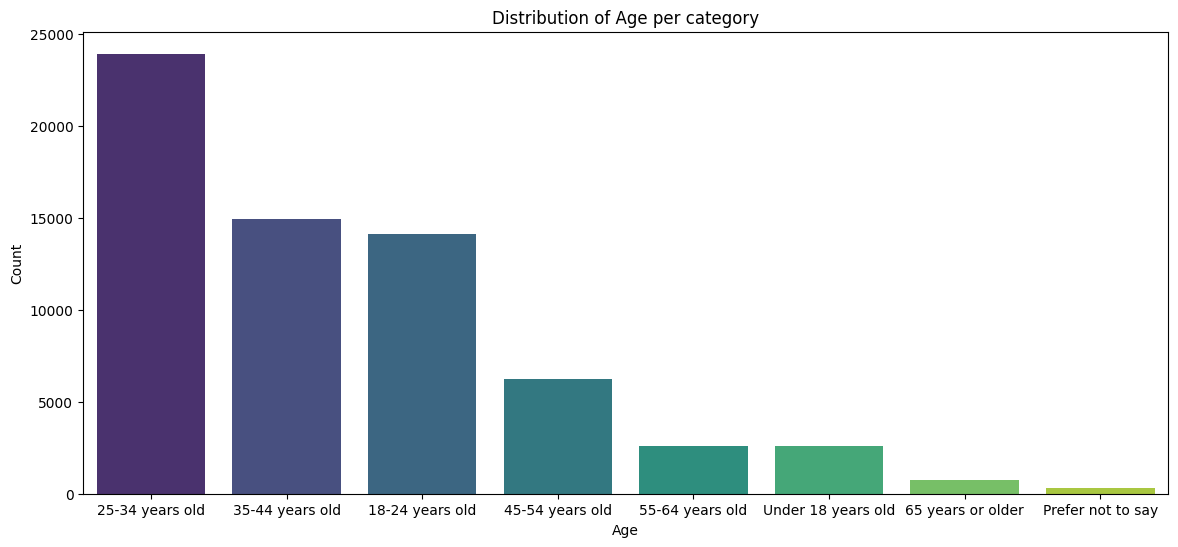

In [19]:
age_order = df['Age'].value_counts().index

plt.figure(figsize = (14,6))
sns.countplot(x ='Age',  data=df, order=age_order, palette='viridis')
plt.ylabel('Count')
plt.xlabel('Age')
plt.title('Distribution of Age per category')
plt.show()

In [20]:
df['DevType'].value_counts()

DevType
Developer, full-stack                            18260
Developer, back-end                               9928
Student                                           5102
Developer, front-end                              3349
Developer, desktop or enterprise applications     2493
Other (please specify):                           2458
Developer, mobile                                 2021
Developer, embedded applications or devices       1623
Engineering manager                               1275
Academic researcher                               1238
Data engineer                                     1118
Data scientist or machine learning specialist     1024
DevOps specialist                                 1019
Research & Development role                        943
Senior Executive (C-Suite, VP, etc.)               837
Developer, game or graphics                        706
Cloud infrastructure engineer                      634
System administrator                               552
De

In [21]:
df['Country'].value_counts()

Country
United States of America                                11095
Germany                                                  4947
India                                                    4231
United Kingdom of Great Britain and Northern Ireland     3224
Ukraine                                                  2672
                                                        ...  
Central African Republic                                    1
Equatorial Guinea                                           1
Niger                                                       1
Guinea                                                      1
Solomon Islands                                             1
Name: count, Length: 185, dtype: int64

In [22]:
df['Currency'].value_counts()

Currency
EUR European Euro            12730
USD\tUnited States dollar    10939
INR\tIndian rupee             2905
GBP\tPound sterling           2614
CAD\tCanadian dollar          1639
                             ...  
KPW\tNorth Korean won            1
BSD\tBahamian dollar             1
ERN\tEritrean nakfa              1
SHP\tSaint Helena pound          1
BMD\tBermudian dollar            1
Name: count, Length: 142, dtype: int64

In [24]:
df['Country'].isna().sum()

6507

In [29]:
df['Country']

185

Country
True     58930
False     6507
Name: count, dtype: int64